In [3]:
import lynxio
import matplotlib.pyplot as plt
import numpy as np
import os
from math import log10
%matplotlib inline

In [15]:
def fft(y, fs=30000):
    """ Get the FFT of a given signal and corresponding frequency bins.
    Parameters:
        y  - signal
        fs - sampling frequency
    Returns:
        (mag, freq) - tuple of spectrum magitude and corresponding frequencies
    """
    n  = len(y)      # Get the signal length
    dt = 1/float(fs) # Get time resolution

    fft_output = np.fft.rfft(y)     # Perform real fft
    rfreqs = np.fft.rfftfreq(n, dt) # Calculatel frequency bins
    fft_mag = np.abs(fft_output)    # Take only magnitude of spectrum

    # Normalize the amplitude by number of bins and multiply by 2
    # because we removed second half of spectrum above the Nyqist frequency 
    # and energy must be preserved
    fft_mag = fft_mag * 2 / n           

    print len(np.array(fft_mag)), len(np.array(rfreqs)) 

In [8]:
def fft_v2(y, freq, fs=30000):
    Ts = 1.0/fs; # sampling interval
    t = np.arange(0,1,Ts) # time vector

    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/fs
    frq = k/T # two sides frequency range
    frq = frq[range(n/2)] # one side frequency range

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(n/2)]
    
    amplitude = []
    
    for fq,amp in zip(frq, Y):
        if fq == freq:
            amplitude.append(max(abs(Y)))
            
    print max(amplitude), freq

['Starting Recording' 'start 0.1 hz' 'stop 0.1 hz' 'start 3 hz' 'stop 3 hz'
 'start 8 hz' 'stop 8 hz' 'start 30hz' 'stop 30 hz' 'start 100 hz'
 'stop 100 hz' 'start 1 khz' 'stop 1 khz' 'start 5 khz' 'stop 5 khz' ''
 'start 15 khz' 'stop 15 khz' 'Stopping Recording']
229888 114945


NameError: name 'baselinepostFFT' is not defined

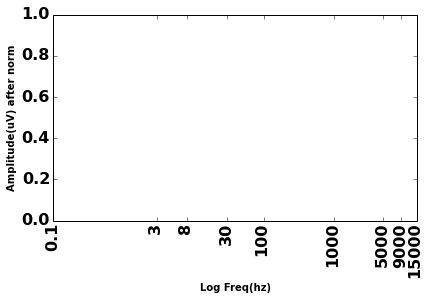

In [16]:
count = 1;
plt.figure(figsize=(30,17))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".ncs") and filename.startswith("CSC"): 
        channelname = filename.split('.')[0]
        plotname = channelname +'FFT.png'
                
        csc = lynxio.loadNcs(filename)
        eventTimestamps, eventId, nttl, eventNames = lynxio.loadNev('Events.nev')
        print eventNames
        
        datapointsbaseline = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[1], eventNames[1], eventTimestamps[2], eventNames[2])[0:229888]
        datapoints1e1hz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[3], eventNames[3], eventTimestamps[4], eventNames[4])[0:229888]     
        datapoints3hz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[5], eventNames[5], eventTimestamps[6], eventNames[6])[0:229888]   
        datapoints8hz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[7], eventNames[7], eventTimestamps[8], eventNames[8])[0:229888]
        datapoints30hz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[9], eventNames[9], eventTimestamps[10], eventNames[10])[0:229888]
        datapoints100hz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[11], eventNames[11], eventTimestamps[12], eventNames[12])[0:229888]
        datapoints1khz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[13], eventNames[13], eventTimestamps[14], eventNames[14])[0:229888]
        datapoints5khz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[16], eventNames[16], eventTimestamps[17], eventNames[17])[0:229888]
        #datapoints9khz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[17], eventNames[17], eventTimestamps[18], eventNames[18])[0:229888]    
        #datapoints15khz = lynxio.fileSplitterUsingEvents(csc, eventTimestamps[19], eventNames[19], eventTimestamps[20], eventNames[20])[0:30000]
        
        #baselinepostFFT = fft_v2(datapointbaseline, 0)
        
        #data = [ fft_v2(datapoints1e1hz, 0.1), fft_v2(datapoints3hz, 3), fft_v2(datapoints8hz, 8) , fft_v2(datapoints30hz, 30) , fft_v2(datapoints100hz,100),
        #           fft_v2(datapoints1khz, 1000), fft_v2(datapoints5khz, 5000), fft_v2(datapoints9khz, 9000), fft_v2(datapoints15khz, 15000)]
        
        """fft_v2(datapoints1e1hz, 3)
        fft_v2(datapoints3hz, 8)
        fft_v2(datapoints8hz, 30)
        fft_v2(datapoints30hz, 100)"""
        fft(datapoints100hz,1000)
        #fft_v2(datapoints1khz, 5000)
        #fft_v2(datapoints5khz, 15000)
        
        x=[log10(0.1),log10(3),log10(8),log10(30),log10(100),log10(1000),log10(5000), log10(9000), log10(15000)]
        labels = ['0.1','3','8','30','100','1000', '5000', '9000', '15000']
        
        plt.subplot(4,4,count)
        plt.xticks(x, labels, fontsize = 16, fontweight = 'bold',rotation = 90)
        plt.yticks(fontsize = 16, fontweight = 'bold')
        plt.ylabel('Amplitude(uV) after norm',fontsize = 10, fontweight = 'bold')
        plt.xlabel('Log Freq(hz)',fontsize = 10, fontweight = 'bold')
        plt.axhline(y=baselinepostFFT, xmin=0, xmax=10, hold=None, color='red')
        plt.plot(x,data, 'b--o')
        count = count +1

plotname = 'all plots.png'
plt.savefig(plotname)
plt.close()